In [1]:
import pandas as pd             # For data analysis 
import matplotlib.pyplot as plt # For barbell chart

In [2]:
raw = pd.read_excel('https://query.data.world/s/xhxxolzavwx7ds2ylfgjt7rzx4522q')

# Replicate the original visualization.

In [3]:
raw # The data is already order properly.

,Topic,True Proportion,Estimated Proportion
0,Have a household income over $1 million,0.00,0.20
1,Are transgender,0.01,0.21
2,"Have a household income over $500,000",0.01,0.26
3,Are Muslim,0.01,0.27
4,Are Native American,0.01,0.27
5,Are Jewish,0.02,0.30
6,Live in New York City,0.03,0.30
7,Are gay or lesbian,0.03,0.30
8,Are atheists,0.03,0.33
9,Are bisexual,0.04,0.29


In [4]:
# PLot points
true_prop = raw['True Proportion']
est_prop = raw['Estimated Proportion']

y_orig = range(len(raw), 0, -1)

y_lab = raw['Topic']

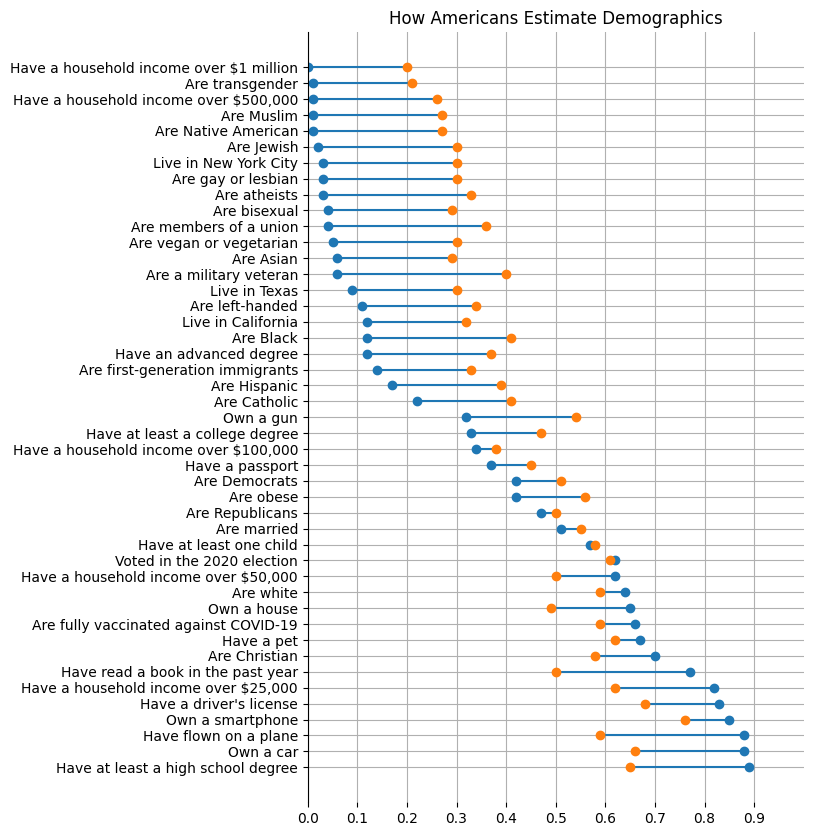

In [5]:
# Plot
fig_orig, ax_orig = plt.subplots()

ax_orig.set_xlim(0,1)
ax_orig.set_xticks([x/10 for x in range(0,10)])
ax_orig.set_yticks(y_orig)
ax_orig.set_yticklabels(y_lab)
ax_orig.set_title("How Americans Estimate Demographics")

ax_orig.spines[['top', 'right', 'bottom']].set_visible(False)
ax_orig.grid(True)

fig_orig.set_figheight(10)

plt.hlines(y_orig, xmin = true_prop, xmax = est_prop)
plt.plot(true_prop, y_orig,'o')
plt.plot(est_prop, y_orig,'o')

# plt.savefig('orig_viz.jpg', bbox_inches = 'tight')

# New Visualization: Emphasizing the Difference Between the True and Estimated Proportion

The original visualization is perhaps the best way to represent the data. It visually captures the increasing magnitude of the difference between true and estimated proportions the farther away from 50% the true proportion is. 

The only change I would suggest would be to adjust the colors of the markers because the intensity of the blue markers, representing the estimated proportion, is far weaker than that of the red, which slightly de-emphasizes the magnitude of the differences. 

The new visualization will place more emphasis on this difference by changing the x-axis to represent the difference between the true and estimated proportions, where the y-axis represents the true proportion.

However, this may as a result decrease visual clarity on what the true proportion is. 

In [6]:
# PLot points
y = true_prop

diff = est_prop - true_prop

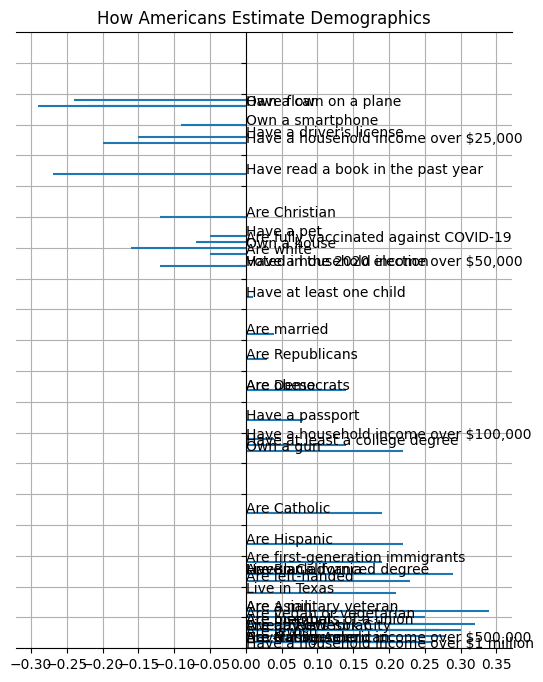

In [11]:
# Plot
fig, ax = plt.subplots()

ax.set_xticks([x/20 for x in range(-40,40)])
ax.set_ylim(0, 1)
ax.set_yticks([x/20 for x in range(0,20)])
ax.set_yticklabels('')
ax.set_title("How Americans Estimate Demographics")
x_annotate = [0] * len(y_lab)
for i in range(0,len(y_lab)-1): 
    ax.annotate(y_lab[i], xy = (x_annotate[i],true_prop[i]))

ax.spines['right'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.grid(True)

fig.set_figheight(8)

plt.hlines(y, xmin = [0]*len(true_prop), xmax = diff)